In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('spotify_churn_dataset.csv')
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


In [3]:
df.drop('user_id',axis=1,inplace=True)


In [4]:
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [5]:
df.shape 

(8000, 11)

In [6]:
df.columns

Index(['gender', 'age', 'country', 'subscription_type', 'listening_time',
       'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8000 non-null   object 
 1   age                    8000 non-null   int64  
 2   country                8000 non-null   object 
 3   subscription_type      8000 non-null   object 
 4   listening_time         8000 non-null   int64  
 5   songs_played_per_day   8000 non-null   int64  
 6   skip_rate              8000 non-null   float64
 7   device_type            8000 non-null   object 
 8   ads_listened_per_week  8000 non-null   int64  
 9   offline_listening      8000 non-null   int64  
 10  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 687.6+ KB


In [8]:
df.isnull().sum()

gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

In [9]:

# Make a copy of the DataFrame to avoid altering the original
df_null = df.copy()

# Get all row and column index positions (excluding the index column itself)
row_indices = np.random.randint(0, df_null.shape[0], size=500)
col_indices = np.random.randint(0, df_null.shape[1], size=500)

# Set 1000 random cells to np.nan
for row, col in zip(row_indices, col_indices):
    df_null.iat[row, col] = np.nan

# Optional: Verify the result
print(df_null.isnull().sum())



gender                   49
age                      40
country                  36
subscription_type        41
listening_time           50
songs_played_per_day     45
skip_rate                49
device_type              56
ads_listened_per_week    40
offline_listening        49
is_churned               42
dtype: int64


In [10]:
df_null.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,Female,54.0,CA,Free,26.0,23.0,0.20,Desktop,31.0,0.0,1.0
1,Other,33.0,DE,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0
2,Male,38.0,AU,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0
3,Female,22.0,CA,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0
4,Other,29.0,US,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0


In [11]:

df_null.to_csv('spotify', index=False)


In [12]:
df=df_null

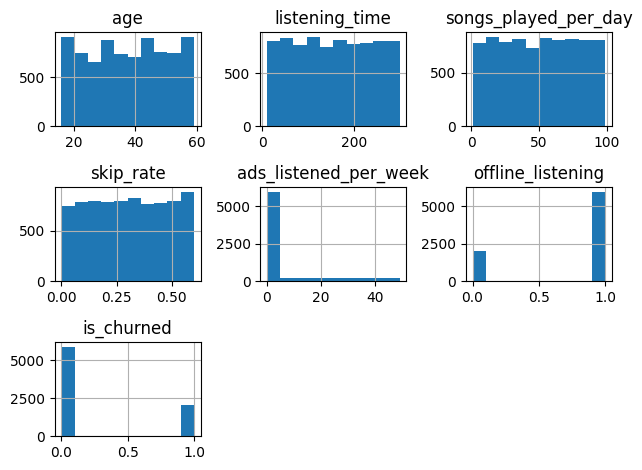

In [13]:
numeric=df.select_dtypes('number')
numeric.hist()
plt.tight_layout()

In [14]:
def missing_values(data):
    if np.issubdtype(data.dtype,np.number):
        return data.fillna(data.median())
    else:
        return data.fillna(data.mode()[0])

In [15]:
df['gender']=missing_values(df['gender'])

In [16]:
df['gender'].isnull().sum()

np.int64(0)

In [17]:
df['age']=missing_values(df['age'])
df['country']=missing_values(df['country'])
df['subscription_type']=missing_values(df['subscription_type'])
df['listening_time']=missing_values(df['listening_time'])
df['songs_played_per_day']=missing_values(df['songs_played_per_day'])
df['skip_rate']=missing_values(df['skip_rate'])
df['device_type']=missing_values(df['device_type'])
df['ads_listened_per_week']=missing_values(df['ads_listened_per_week'])
df['offline_listening']=missing_values(df['offline_listening'])
df['is_churned']=missing_values(df['is_churned'])


In [18]:
df.isnull().sum()

gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

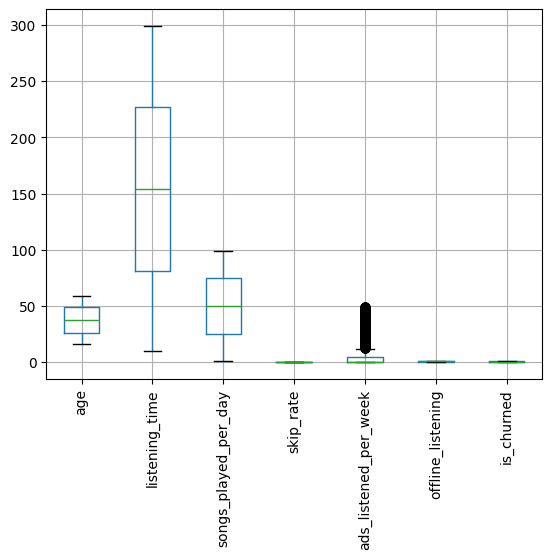

In [19]:
numeric.boxplot()
plt.xticks(rotation=90)
plt.show()

In [20]:
def outlier_detection(data):
    outlier=[]
    q1=np.percentile(data,25,method='midpoint')
    q3=np.percentile(data,75,method='midpoint')
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)

    outlier_condition=(data<lower) | (data>upper)
    outlier=data[outlier_condition]
    outlier_index=data[outlier_condition].index

    return outlier,outlier_index,(len(outlier)/len(data))*100

In [21]:
outliers,indices,percentage=outlier_detection(df['ads_listened_per_week'])

In [22]:
print(outliers)
print(indices)
print(percentage)

0       31.0
5       13.0
9       44.0
10      37.0
11      39.0
        ... 
7969    46.0
7979    44.0
7989    29.0
7992    49.0
7993    40.0
Name: ads_listened_per_week, Length: 1673, dtype: float64
Index([   0,    5,    9,   10,   11,   26,   27,   35,   49,   52,
       ...
       7908, 7923, 7926, 7936, 7959, 7969, 7979, 7989, 7992, 7993],
      dtype='int64', length=1673)
20.9125


In [23]:
lower=np.percentile(df['ads_listened_per_week'],25,method='midpoint')
upper=np.percentile(df['ads_listened_per_week'],75,method='midpoint')
df['ads_listened_per_week'].clip(lower=lower,upper=upper,inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_20964\3415457212.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ads_listened_per_week'].clip(lower=lower,upper=upper,inplace=True)


<Axes: ylabel='ads_listened_per_week'>

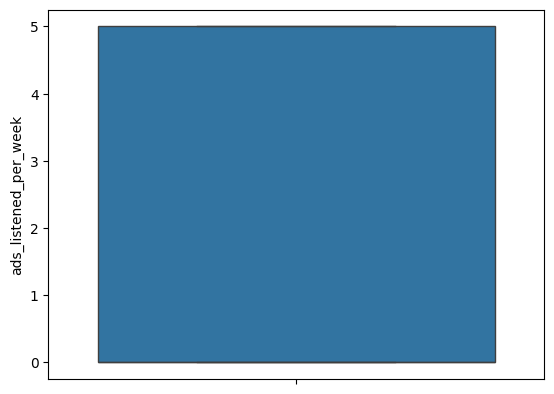

In [24]:
sns.boxplot(df['ads_listened_per_week'])

In [25]:
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,Female,54.0,CA,Free,26.0,23.0,0.20,Desktop,5.0,0.0,1.0
1,Other,33.0,DE,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0
2,Male,38.0,AU,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0
3,Female,22.0,CA,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0
4,Other,29.0,US,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0


In [26]:
df.reset_index(drop=True)

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,Female,54.0,CA,Free,26.0,23.0,0.20,Desktop,5.0,0.0,1.0
1,Other,33.0,DE,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0
2,Male,38.0,AU,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0
3,Female,22.0,CA,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0
4,Other,29.0,US,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7995,Other,44.0,DE,Student,237.0,36.0,0.30,Mobile,0.0,1.0,1.0
7996,Male,34.0,AU,Premium,61.0,64.0,0.59,Mobile,0.0,1.0,0.0
7997,Female,17.0,US,Free,81.0,62.0,0.33,Desktop,5.0,0.0,0.0
7998,Female,34.0,IN,Student,245.0,94.0,0.27,Desktop,0.0,1.0,0.0


In [27]:
df['gender'].value_counts()

gender
Male      2723
Female    2639
Other     2638
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

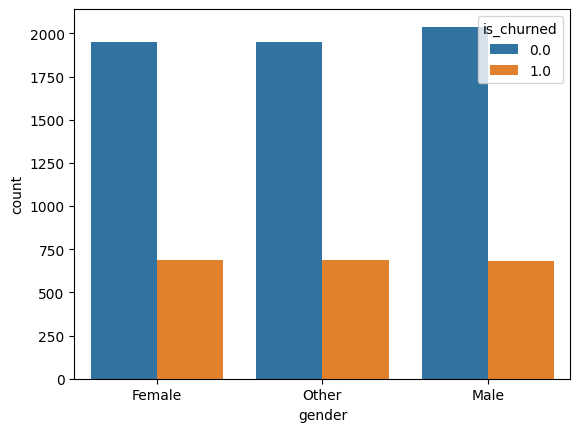

In [28]:
sns.countplot(data=df,x='gender', hue='is_churned')

<Axes: xlabel='gender', ylabel='is_churned'>

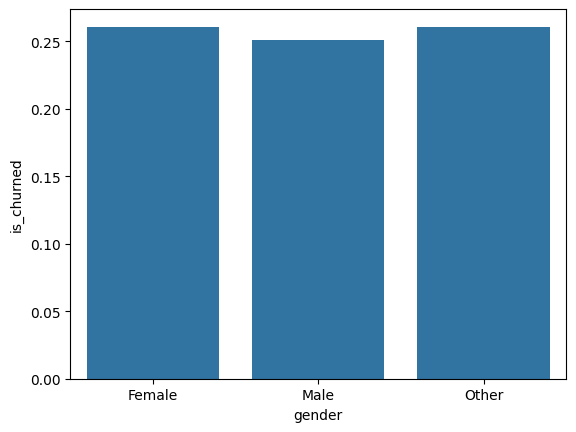

In [29]:
churn_rate=df.groupby('gender')['is_churned'].mean().reset_index()

sns.barplot(data=churn_rate,x='gender',y='is_churned')

In [30]:
churn_rate

,gender,is_churned
0,Female,0.260326
1,Male,0.251194
2,Other,0.260804


In [31]:
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,Female,54.0,CA,Free,26.0,23.0,0.20,Desktop,5.0,0.0,1.0
1,Other,33.0,DE,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0
2,Male,38.0,AU,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0
3,Female,22.0,CA,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0
4,Other,29.0,US,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0


In [32]:
df1=pd.get_dummies(df['gender']).astype(int)
df=pd.concat([df,df1],axis=1)

In [34]:
df.drop('gender',axis=1,inplace=True)

In [35]:
df.head()

,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,Female,Male,Other
0,54.0,CA,Free,26.0,23.0,0.20,Desktop,5.0,0.0,1.0,1,0,0
1,33.0,DE,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0,0,0,1
2,38.0,AU,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0,0,1,0
3,22.0,CA,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0,1,0,0
4,29.0,US,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0,0,0,1


In [36]:
df['country'].unique()

array(['CA', 'DE', 'AU', 'US', 'UK', 'IN', 'FR', 'PK'], dtype=object)

In [37]:
import category_encoders as ce

encoder=ce.TargetEncoder(cols=['country'])
X=df['country']
y=df['is_churned']

df['country']=encoder.fit_transform(X,y)

In [38]:
df.head()

,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,Female,Male,Other
0,54.0,0.245522,Free,26.0,23.0,0.20,Desktop,5.0,0.0,1.0,1,0,0
1,33.0,0.272095,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0,0,0,1
2,38.0,0.256335,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0,0,1,0
3,22.0,0.245522,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0,1,0,0
4,29.0,0.256795,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0,0,0,1


In [39]:
df['subscription_type'].unique()

array(['Free', 'Family', 'Premium', 'Student'], dtype=object)

In [41]:
freq=df['subscription_type'].value_counts()
df['subscription_type']=df['subscription_type'].map(freq)

In [42]:
df.head()

,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,Female,Male,Other
0,54.0,0.245522,2010,26.0,23.0,0.20,Desktop,5.0,0.0,1.0,1,0,0
1,33.0,0.272095,1894,141.0,62.0,0.34,Web,0.0,1.0,0.0,0,0,1
2,38.0,0.256335,2144,199.0,38.0,0.04,Mobile,0.0,1.0,1.0,0,1,0
3,22.0,0.245522,1952,36.0,2.0,0.31,Mobile,0.0,1.0,0.0,1,0,0
4,29.0,0.256795,1894,250.0,57.0,0.36,Mobile,0.0,1.0,1.0,0,0,1


In [43]:
df['device_type'].unique()

array(['Desktop', 'Web', 'Mobile'], dtype=object)

In [44]:
import category_encoders as ce

X=df['device_type']
y=df['is_churned']

encoder=ce.TargetEncoder(cols=['device_type'])
df['device_type']=encoder.fit_transform(X,y)

In [45]:
df.head()

,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,Female,Male,Other
0,54.0,0.245522,2010,26.0,23.0,0.20,0.255690,5.0,0.0,1.0,1,0,0
1,33.0,0.272095,1894,141.0,62.0,0.34,0.248848,0.0,1.0,0.0,0,0,1
2,38.0,0.256335,2144,199.0,38.0,0.04,0.267802,0.0,1.0,1.0,0,1,0
3,22.0,0.245522,1952,36.0,2.0,0.31,0.267802,0.0,1.0,0.0,1,0,0
4,29.0,0.256795,1894,250.0,57.0,0.36,0.267802,0.0,1.0,1.0,0,0,1
